In [214]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


TASK: Count the white pixels per row (instead of per column). Determine the maximum value of white pixels per row, maxfil, showing the number of rows and their respective positions with a number of white pixels greater than or equal to 0.95*maxfil.

In [219]:
img = cv2.imread('mandril.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gris = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

plt.figure()
plt.axis("off")
plt.imshow(gris, cmap='gray')
plt.show()

[ WARN:0@14639.333] global loadsave.cpp:268 findDecoder imread_('mandril.jpg'): can't open/read file: check file path/integrity


error: OpenCV(4.11.0) /Users/xperience/GHA-Actions-OpenCV/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/color.cpp:199: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


Apply the Canny edge detector to the grayscale image, and display the result using matplotlib.


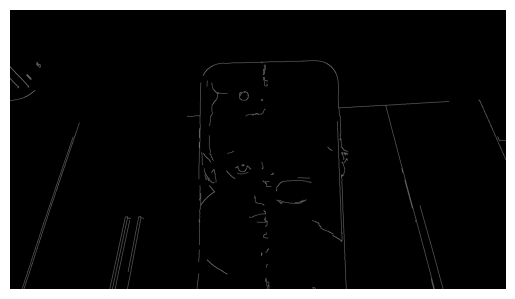

In [208]:
canny = cv2.Canny(gris, 100, 200)

plt.imshow(canny, cmap='gray')
plt.axis("off")
plt.show()

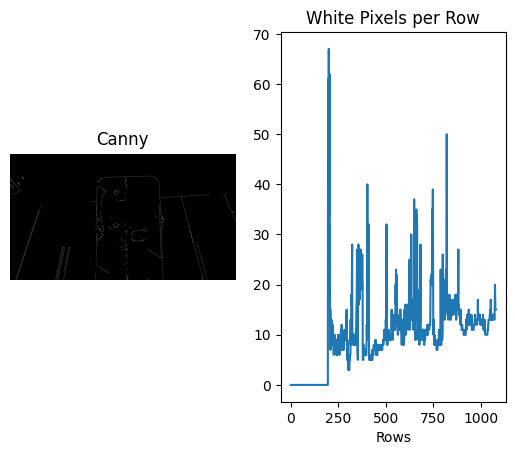

In [200]:
white_pixels = np.sum(canny == 255, axis=1)

plt.figure()

plt.subplot(1, 2, 1)
plt.imshow(canny, cmap='gray')
plt.axis("off")
plt.title('Canny')


plt.subplot(1, 2, 2)
plt.plot(white_pixels)
plt.xlabel('Rows')
plt.title('White Pixels per Row')


plt.show()


In [201]:
maxfil = np.max(white_pixels)
print(f'Maximum white pixels per row: {maxfil}')

rows_above_thresold = np.where(white_pixels >= 0.95*maxfil)[0]

print(f'Number of row with pixel above thresold: {len(rows_above_thresold)}, positions: {rows_above_thresold}')

Maximum white pixels per row: 67
Number of row with pixel above thresold: 1, positions: [200]


TASK: Apply thresholding to the image resulting from the Sobel filter (converted to 8 bits), then count the nonzero pixels per row and column, similar to what was done in the example with the Canny output. Calculate the maximum value of the count per row and column and determine the rows and columns with a number of white pixels greater than or equal to 95% of the maximum. Highlight these rows and columns on the image with a graphic primitive. How do the results obtained from Sobel and Canny compare?

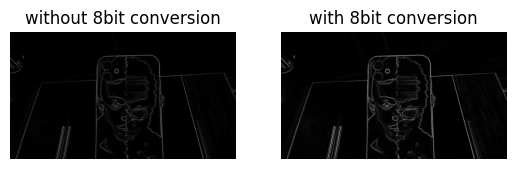

In [202]:
ggris = cv2.GaussianBlur(gris, (3,3), 0) #add gaussian blur

sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1,0)
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0,1)

sobel = np.sqrt(sobelx**2 + sobely**2)

plt.figure()

#without 8bit conversion
plt.subplot(1,2,1)
plt.title('without 8bit conversion')
plt.imshow(sobel, cmap='gray')
plt.axis('off')

#with 8bit conversion
sobel8 = cv2.convertScaleAbs(sobel)
plt.subplot(1,2,2)
plt.title('with 8bit conversion')
plt.imshow(sobel8, cmap='gray')
plt.axis('off')

plt.show()

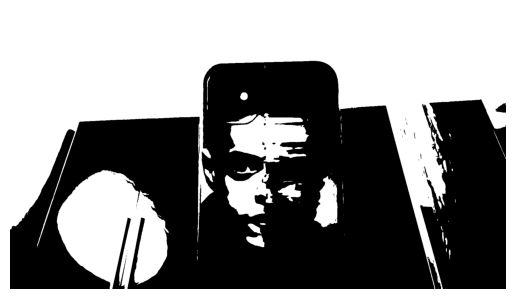

In [203]:
#add thresholding
threshold = 130

_, thresholded_image = cv2.threshold(ggris, threshold, 255, cv2.THRESH_BINARY)
plt.imshow(thresholded_image, cmap='gray')
plt.axis('off')
plt.show()

In [204]:
nonzero_col = np.count_nonzero(thresholded_image, axis=1)
nonzero_row = np.count_nonzero(thresholded_image, axis=0)

max_nonzero_col = np.max(nonzero_col)
max_nonzero_col_pos = np.argmax(nonzero_col)

max_nonzero_row = np.max(nonzero_row)
max_nonzero_row_pos = np.argmax(nonzero_row)

print(f'max number of non zero pixel present in a column is: {max_nonzero_col}, in position: {max_nonzero_col_pos}')
print(f'max number of non zero pixel present in a row is: {max_nonzero_row},  in position: {max_nonzero_row_pos} ')

max number of non zero pixel present in a column is: 1920, in position: 0
max number of non zero pixel present in a row is: 884,  in position: 388 


number of cols with nonzero count above treshold: 199, positions: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198]
number of rows with nonzero count above treshold: 83, positions: [   0    1    2    3    4    5    6    7  351  352  353  354

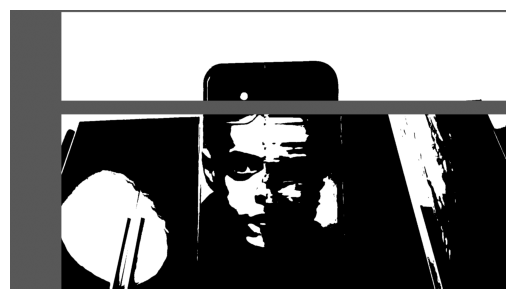

In [205]:
cols_above_thresold = np.where(nonzero_col >= 0.95*max_nonzero_col)[0]
rows_above_thresold = np.where(nonzero_row >= 0.95*max_nonzero_row)[0]

print(f'number of cols with nonzero count above treshold: {len(cols_above_thresold)}, positions: {cols_above_thresold}')
print(f'number of rows with nonzero count above treshold: {len(rows_above_thresold)}, positions: {rows_above_thresold}')

height, width = thresholded_image.shape


for i in range(len(cols_above_thresold)):
     cv2.line(thresholded_image, (cols_above_thresold[i], 0), (cols_above_thresold[i], height), (88), 1)
     
for i in range(len(rows_above_thresold)):
     cv2.line(thresholded_image, (0, rows_above_thresold[i],), (width, rows_above_thresold[i],), (88), 1)

plt.imshow(thresholded_image, cmap='gray', vmin=0, vmax=255)
plt.axis('off')
plt.show()


TASK: Propose a demonstrator that captures images from the camera and allows you to showcase what you have learned in these two practical sessions to people who are not taking the course :). Therefore, in addition to being able to display the original webcam image, it should include at least two different uses of OpenCV functions covered so far.

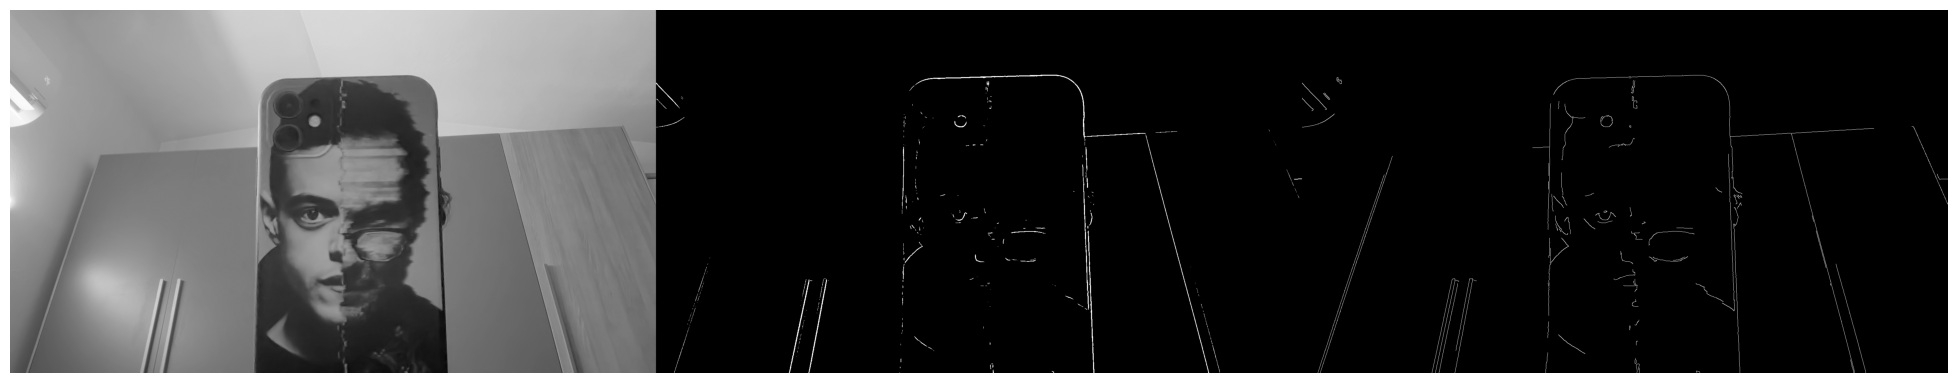

In [196]:
vid = cv2.VideoCapture(0)

if vid.isOpened():
    while True:
        
        ret,frame = vid.read()
        
        if ret:
            
            h, w, c = frame.shape
            
            #GRIS            
            gris = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            #SOBEL
            threshold = 130
            ggris = cv2.GaussianBlur(gris, (3, 3), 0)
            sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1,0)
            sobely = cv2.Sobel(ggris, cv2.CV_64F, 0,1)
            sobel = np.sqrt(sobelx**2 + sobely**2)
            sobel8 = cv2.convertScaleAbs(sobel)
            _, sobel8_thresholded = cv2.threshold(sobel8,threshold, 255, cv2.THRESH_BINARY )

            #CANNY
            canny = cv2.Canny(gris, 100, 200)
            
            collage = np.hstack((gris,sobel8_thresholded, canny))
            
            cv2.imshow(winname='Video', mat=cv2.resize(collage, (int(w*1.5),int(h/2)),cv2.INTER_NEAREST))
            
        if cv2.waitKey(20) == 27:
            break
        
    vid.release()
    cv2.destroyAllWindows()
    
    plt.figure(figsize=(25,15))
    plt.imshow(collage, cmap='gray')
    plt.axis('off')
    cv2.imwrite(img=collage,filename='collage_border_task.png')
    